In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# datos

**usarios con Ansiedad**

In [ ]:
archivo = '/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/Usuarios con ansiedad/User_ansiedad (11).csv'
ansiedad = pd.read_csv(archivo, sep =',')
ansiedad.head(10)

,class,tweet_id,day,time,tweet,tweet_favorite_count,tweet_retweet_count,tweet_source,user_id,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
0,ANXIETY,1438363451487920132,2021-09-16,04:45:44,@USUARIO Quiero ser tu,0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
1,ANXIETY,1438363270423977984,2021-09-16,04:45:01,"@USUARIO Me pasa, en navidad salimos a la casa...",0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
2,ANXIETY,1438362508054642690,2021-09-16,04:42:00,No soy de México hdsptsmd,0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
3,ANXIETY,1438362447123988482,2021-09-16,04:41:45,"Viva México, las mujeres y Louis",2,1,Twitter for Android,1351876916844834816,1644,1685,9,32911
4,ANXIETY,1438362091501543425,2021-09-16,04:40:20,"@USUARIO Ayyy, que lindo",0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
5,ANXIETY,1438361162572304385,2021-09-16,04:36:39,CAES MAL PRIMA OE,0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
6,ANXIETY,1438361139549769728,2021-09-16,04:36:33,Conocí el amor de mi vida en el concierto de e...,0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
7,ANXIETY,1438360329809956866,2021-09-16,04:33:20,Lloro con el guante de Perú,0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
8,ANXIETY,1438359477711945731,2021-09-16,04:29:57,"Mi ex me hablaba de los salchipulpos, dale que...",0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
9,ANXIETY,1438359321562304512,2021-09-16,04:29:20,@USUARIO AYUDA QUE ES ESO,0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911


**Usarios de control**

In [ ]:
archivo_c = '/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/Usarios de control 2/User_control (12).csv'
control = pd.read_csv(archivo, sep =',')
control.head(10)

,class,tweet_id,day,time,tweet,tweet_favorite_count,tweet_retweet_count,tweet_source,user_id,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
0,ANXIETY,1438363451487920132,2021-09-16,04:45:44,@USUARIO Quiero ser tu,0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
1,ANXIETY,1438363270423977984,2021-09-16,04:45:01,"@USUARIO Me pasa, en navidad salimos a la casa...",0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
2,ANXIETY,1438362508054642690,2021-09-16,04:42:00,No soy de México hdsptsmd,0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
3,ANXIETY,1438362447123988482,2021-09-16,04:41:45,"Viva México, las mujeres y Louis",2,1,Twitter for Android,1351876916844834816,1644,1685,9,32911
4,ANXIETY,1438362091501543425,2021-09-16,04:40:20,"@USUARIO Ayyy, que lindo",0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
5,ANXIETY,1438361162572304385,2021-09-16,04:36:39,CAES MAL PRIMA OE,0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
6,ANXIETY,1438361139549769728,2021-09-16,04:36:33,Conocí el amor de mi vida en el concierto de e...,0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
7,ANXIETY,1438360329809956866,2021-09-16,04:33:20,Lloro con el guante de Perú,0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
8,ANXIETY,1438359477711945731,2021-09-16,04:29:57,"Mi ex me hablaba de los salchipulpos, dale que...",0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911
9,ANXIETY,1438359321562304512,2021-09-16,04:29:20,@USUARIO AYUDA QUE ES ESO,0,0,Twitter for Android,1351876916844834816,1644,1685,9,32911


**PREPARACIÓN DE DATOS**

*Cargar y limpiar*

In [ ]:
!pip install pyspellchecker
!pip install spacy
!python -m spacy download es_core_news_sm

In [ ]:
import string
import re
import os
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# limpiar texto y Crear Tokens

In [ ]:
import re
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def load_doc(filename):
    try:
        data = pd.read_csv(filename, delimiter='\t')  # Indicamos el delimitador como '\t' para TSV
        return data
    except Exception as e:
        print("Error:", e)
        return None

#Creamos un función de limpieza del texto y  los guarde en tokens indivicuales o lista de palabras
def clean_doc(text):
    # Eliminar hashtags
    text = re.sub(r'#\w+', '', text)

    # Eliminar URLs o enlaces
    text = re.sub(r'(https?://)?[a-zA-Z0-9]+\.[a-zA-Z0-9]+\S*', '', text)

    # Eliminar nombres de usuarios de Twitter
    text = re.sub(r'@\w+', '', text)

    # Eliminar Nombres propios
    text = re.sub(r'\b[A-Z][a-z]+\b', '', text)

    # Eliminar todos los caracteres especiales
    text = re.sub(r'[^\w\s]+', '', text)

    # Eliminar prefijos y números
    text = re.sub(r'\b\w{1,2}\b|\d+', '', text)

    # Eliminar palabras específicas
    specific_words = ['retweet', 'retweets', 'hashtag', 'trending', 'mención', 'enlace', 'emoji', 'timeline', 'interacciones',
                      'tuit', 'seguidores', 'notificaciones', 'seguir', 'favorito', 'perfil', 'tendencia', 'influencer',
                      'compartir', 'actualización', 'explorar', 'seguir', 'comunidad', 'contenido', 'popular',
                      'recomendar', 'experiencia', 'conectar', 'comentar', 'compartir', 'comunidad', 'actualización',
                      'drk', 'followers', 'stats', 'for', 'new', 'little', 'unfollower', 'unfollowers', 'today', 'shit','twitter','nombre',
                      'eric','story','great', 'short','squeeze','piggly','wiggly','hmv','even','follas','you','i','he','she',
                      'it','we','they','the','and','that','these','those','tweet','followed','follower']
    text = ' '.join([word for word in text.split() if word not in specific_words])

    # Eliminar emojis
    emojis = re.findall(r'[^\w\s,]', text)
    cleaned_emojis = [emoji for emoji in emojis if emoji not in ['@', '#', '/', '?','¿','.','…','"',':','“','!','¡','°','-',"‘",'’',
                                                                 '=',';','(',')',"'","'",'&','€','%','$','*','+','|', '”','🇦','🇷',',',
                                                                 ', ','—','«',' »','»','« ','[, ]','[,]',',',', ','',' ',' ♀',' 🏽']]
    for emoji in cleaned_emojis:
        text = text.replace(emoji, '')

    # Convertir el texto a minúsculas
    text = text.lower()

    # Eliminar signos de puntuación
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Tokenización de palabras
    tokens = word_tokenize(text)

    # Eliminar palabras vacías en español
    stop_words = set(stopwords.words('spanish'))
    tokens = [word for word in tokens if not word in stop_words]

    # Eliminar tokens de un solo carácter
    tokens = [word for word in tokens if len(word) > 1]

    return tokens


*Extraer y Definir vocabulario*

In [ ]:
# Función para agregar documentos al vocabulario usando TF-IDF
def add_doc_vocab_from_tsv_tfidf(filename, vectorizer, vocab):
    data = pd.read_csv(filename, sep=',')
    docs = data['tweet'].apply(clean_doc)
    docs_joined = [' '.join(tokens) for tokens in docs]
    vectorizer.fit(docs_joined)
    feature_names = vectorizer.get_feature_names_out()
    vocab.update(feature_names)

# Función para procesar documentos en un directorio usando TF-IDF
def process_docs_in_directory_tfidf(directory, vectorizer, vocab):
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            path = os.path.join(directory, filename)
            add_doc_vocab_from_tsv_tfidf(path, vectorizer, vocab)

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Inicializar el contador de vocabulario
vocab = Counter()

# Procesar documentos en el directorio 'Control'
process_docs_in_directory_tfidf('/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/Usarios de control 2/', tfidf_vectorizer, vocab)

# Procesar documentos en el directorio 'Ansiedad'
process_docs_in_directory_tfidf('/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/Usuarios con ansiedad', tfidf_vectorizer, vocab)
umbral = 10 # elimanamos la palabras que tengan 10 o menos frecuencia
tokens =[k for k,c in vocab.items() if c >= umbral]

# Imprimir la longitud del vocabulario y los 50 términos más comunes
print(f'Términos totales: {len(vocab)}')
print(f'Vocabulario con tokens más frecuentes:{len(tokens)}')
print('Los 50 términos más frecuentes')
print(vocab.most_common(50))

Términos totales: 80326
Vocabulario con tokens más frecuentes:7685
Los 50 términos más frecuentes
[('httpurl', 179), ('mejor', 178), ('vez', 178), ('bien', 177), ('hace', 177), ('ser', 177), ('hacer', 176), ('siempre', 176), ('ver', 176), ('ahora', 174), ('cosas', 174), ('puede', 174), ('cada', 173), ('solo', 173), ('años', 172), ('gente', 172), ('mal', 172), ('mismo', 172), ('alguien', 171), ('así', 171), ('cuenta', 171), ('tan', 171), ('tener', 171), ('tiempo', 171), ('quiero', 170), ('van', 170), ('verdad', 170), ('vida', 170), ('hoy', 169), ('nadie', 169), ('día', 168), ('gusta', 168), ('nunca', 168), ('puedo', 168), ('bueno', 167), ('decir', 167), ('menos', 167), ('voy', 167), ('creo', 166), ('gracias', 166), ('pasa', 166), ('veces', 166), ('año', 165), ('casa', 165), ('dice', 165), ('mañana', 165), ('persona', 165), ('dos', 164), ('días', 164), ('mundo', 164)]


In [ ]:
# Función para guardar los términos en una lista de palabras
def save_list(lines, filename):
    data = '\n'.join(lines)
    with open(filename, 'w') as file:
        file.write(data)

In [ ]:
# Guardar la lista de términos o vocabulario en un archivo llamado vocab.txt
save_list(vocab.keys(), '/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/vocab_tfidf.txt')

In [ ]:
archivo = open("/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/vocab_tfidf.txt")
print(archivo.read())

In [ ]:
import pandas as pd
import spacy
from spacy.lang.es import Spanish
from nltk.corpus import stopwords
# Cargar modelo de spaCy
nlp = spacy.load("es_core_news_sm")
# Función para lematizar y extraer términos

# Cargar stopwords en español
stopwords_es = set(stopwords.words('spanish'))

def extractTerms(text):
    # Tokenización y lematización con spaCy
    doc = nlp(text)
    lemmatized_terms = [token.lemma_ for token in doc if token.text.lower() not in stopwords_es]

    return lemmatized_terms

**Representación de bolsa de palabras (representación vectorial)**

*Revisiones a Lineas de Tokens*

In [ ]:
def doc_to_line(filename, vocab):
  doc = load_doc(filename)
  tokens = clean_doc(doc)
  tokens = [w for w in tokens if w in vocab]
  return ' '.join(tokens)

In [ ]:
import os
import pandas as pd
from nltk.classify.senna import path

def process_docs(directory, vocab):
    lines = []
    for filename in os.listdir(directory):
        if not filename.endswith('.tsv'):
            continue
        path = os.path.join(directory, filename)

        # Cargar el archivo TSV en un DataFrame
        data = pd.read_csv(path, sep='\t')  # Usamos sep='\t' para especificar que el archivo es tsv

        # Procesar la columna TWEET_TEXT para obtener los tokens
        tokens_list = data['TWEET_TEXT'].apply(clean_doc)
        #tokens_list = data['TWEET_TEXT'].apply(extractTerms)

        for tokens in tokens_list:
            line = ' '.join(tokens)
            lines.append(line)

    return lines

In [ ]:
def load_clean_dataset(vocab):
  Cont = process_docs('/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/Usarios de control 2/', tfidf_vectorizer, vocab)
  Ans = process_docs('/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/Usuarios con ansiedad/',tfidf_vectorizer, vocab)

  docs = Ans + Cont

  labels = [1 for _ in range(len(Ans))] + [0 for _ in range(len(Cont))]
  return docs, labels

In [ ]:
vocab_filename = '/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/vocab_tfidf.txt'
with open(vocab_filename, 'r') as file:
    vocab_content = file.read()

vocab = vocab_content.split()
vocab = set(vocab)
print(vocab)


*Revisiones de los tweets a vectores*

**Convertir y tranformar el documento a vectores codigicados**

In [ ]:
def process_docs(directory, vocab, is_train):
    lines = list()
    for filename in os.listdir(directory):
        if is_train and filename.startswith('(72)'):
            continue  # Omitir archivos de prueba en el conjunto de entrenamiento
        if not is_train and not filename.startswith('(72)'):
            continue  # Omitir archivos de entrenamiento en el conjunto de prueba
        path = os.path.join(directory, filename)
        doc = load_doc(path)
        line = doc_to_line(doc, vocab)
        lines.append(line)
    return lines

In [ ]:
import array
#Del mismo modo, la función load_clean_dataset() debe actualizarse para cargar el entrenamiento o prueba
# y asegúrarse de que devuelva una matriz Numpy
def load_clean_dataset(vocab, is_train):
  Dep = process_docs('/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/Usuarios con ansiedad/', vocab, is_train)
  Cont = process_docs('/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/Usarios de control 2/', vocab, is_train)
  docs = Dep + Cont
  labels = np.array([1 for _ in range(len(Dep))] + [0 for _ in range(len(Cont))])
  return docs, labels


In [ ]:
def process_docs(directory, vocab, is_train):
    lines = list()
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        if os.path.isfile(path):  # Verificar si es un archivo antes de procesarlo
            doc = load_doc(path)
            line = ' '.join(clean_doc(doc))
            lines.append(line)
    return lines

def load_doc(filename):
    with open(filename, 'r') as file:
        text = file.read()
    return text


In [ ]:
import string
import re
from os import listdir
import numpy as np
from numpy import array
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

vocab_filename = '/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/vocab_tfidf.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

train_docs, y_train = load_clean_dataset(vocab, True)
test_docs, y_test = load_clean_dataset(vocab, False)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs)

x_train = tokenizer.texts_to_matrix(train_docs, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_docs, mode='tfidf')

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(180, 84489)
(180, 84489)
(180,)
(180,)


**Modelo análisis de texto**

#Red neuronal

In [ ]:
#percertron multicapa
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
def Rn_model(n_words):
  model = Sequential()
  model.add(Dense(150, input_shape = (n_words, ), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  model.summary()
  plot_model(model, to_file='model.png', show_shapes=True)
  return model

In [ ]:
n_words = x_test.shape[1]
model_r = Rn_model(n_words)

model_r.fit(x_train, y_train, epochs=10, verbose=2)
loss, acc = model_r.evaluate(x_test, y_test, verbose=0)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               12673500  
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 12673651 (48.35 MB)
Trainable params: 12673651 (48.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
6/6 - 2s - loss: 1.3287 - accuracy: 0.6389 - 2s/epoch - 342ms/step
Epoch 2/10
6/6 - 1s - loss: 0.0664 - accuracy: 0.9722 - 1s/epoch - 193ms/step
Epoch 3/10
6/6 - 1s - loss: 0.0041 - accuracy: 1.0000 - 1s/epoch - 193ms/step
Epoch 4/10
6/6 - 1s - loss: 0.0023 - accuracy: 1.0000 - 1s/epoch - 193ms/step
Epoch 5/10
6/6 - 1s - loss: 0.0015 - accuracy: 1.0000 - 1s/epoch - 195ms/step
Epoch 6/10
6/6 - 1s 

In [ ]:
print('accuracy en test: %f' % (acc*100))

accuracy en test: 100.000000


In [ ]:
import os
import joblib
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Cargar los datos limpios (entrenamiento y prueba)
vocab_filename = '/content/drive/MyDrive/Experimentación Python Tesis /Experimento por agrupación de usuarios/vocab_tfidf.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

train_docs, y_train = load_clean_dataset(vocab, True)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs)

x_train = tokenizer.texts_to_matrix(train_docs, mode='tfidf')
# Dividir los datos en conjuntos de entrenamiento (70%) y validación (30%)
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)


In [ ]:
print(x_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(180, 84489)
(54, 84489)
(126,)
(54,)


In [ ]:
# Crear una red neuronal secuencial
model = Sequential()

# Agregar una capa de entrada con el número de características (vocabulario) en tu matriz TF-IDF
model.add(Dense(328, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.1))  # Dropout para regularización

# Agregar una capa oculta
model.add(Dense(164, activation='relu'))
model.add(Dropout(0.1))  # Dropout para regularización

# Agregar una capa de salida con una neurona y función de activación sigmoide para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo en los datos de entrenamiento
history = model.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de validación
y_val_pred = (model.predict(X_val) > 0.5).astype(int)

# Calcular métricas de evaluación en el conjunto de validación
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Calcular métricas de evaluación en el conjunto de entrenamiento
y_train_pred = (model.predict(X_train) > 0.5).astype(int)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

Epoch 1/20
5/5 [==============================] - 5s 646ms/step - loss: 1.4230 - accuracy: 0.5556 - val_loss: 2.5850 - val_accuracy: 0.4815
Epoch 2/20
5/5 [==============================] - 3s 519ms/step - loss: 0.3607 - accuracy: 0.9365 - val_loss: 0.6168 - val_accuracy: 0.8519
Epoch 3/20
5/5 [==============================] - 3s 524ms/step - loss: 0.0260 - accuracy: 0.9921 - val_loss: 1.1921 - val_accuracy: 0.7593
Epoch 4/20
5/5 [==============================] - 3s 526ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.2504 - val_accuracy: 0.7593
Epoch 5/20
5/5 [==============================] - 4s 836ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.2415 - val_accuracy: 0.7593
Epoch 6/20
5/5 [==============================] - 4s 747ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.2207 - val_accuracy: 0.7778
Epoch 7/20
5/5 [==============================] - 3s 525ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.2049 - val_accuracy: 0.7778
Epoch 8/20
5/5 [====

In [ ]:
# Imprimir métricas de entrenamiento
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Exactitud (entrenamiento): {round(accuracy_train, 2) * 100}%")
print(f"Precisión (entrenamiento): {round(precision_train, 2) * 100}%")
print(f"Recall (entrenamiento): {round(recall_train, 2) * 100}%")
print(f"F1-score (entrenamiento): {round(f1_train, 2) * 100}%")
print('-------------------------------------------------------------------------')
# Imprimir métricas de evaluación
print(f"Exactitud en el conjunto de validación: {round(accuracy, 2) * 100}%")
print(f"Precisión en el conjunto de validación: {round(precision, 2) * 100}%")
print(f"Recall en el conjunto de validación: {round(recall, 2) * 100}%")
print(f"F1-score en el conjunto de validación: {round(f1, 2) * 100}%")


Métricas en el conjunto de entrenamiento:
Exactitud (entrenamiento): 100.0%
Precisión (entrenamiento): 100.0%
Recall (entrenamiento): 100.0%
F1-score (entrenamiento): 100.0%
-------------------------------------------------------------------------
Exactitud en el conjunto de validación: 81.0%
Precisión en el conjunto de validación: 100.0%
Recall en el conjunto de validación: 60.0%
F1-score en el conjunto de validación: 75.0%


# **Matriz de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_val)

# Obtiene la matriz de confusión. Las filas corresponden a las clases reales,
umbral = 0.5  # Puedes ajustar este umbral según tus necesidades
y_pred_binario = (y_pred > umbral).astype(int)

# Calcular la matriz de confusión con las etiquetas binarias
cm = confusion_matrix(y_val, y_pred_binario)
prop_real = np.sum(y_val)/len(y_val)
prop_etiqutados = (cm[0,1]+cm[1,1])/len(y_val)

print("Matriz de confusión: \n\n", cm, "\n")
print('Proporción de comentarios positivos: %.2f'% prop_real)
print('Proporción de comentarios positivos etiquetados: %.2f'% prop_etiqutados)

2/2 [==============================] - 0s 35ms/step
Matriz de confusión: 

 [[29  0]
 [10 15]] 

Proporción de comentarios positivos: 0.46
Proporción de comentarios positivos etiquetados: 0.28


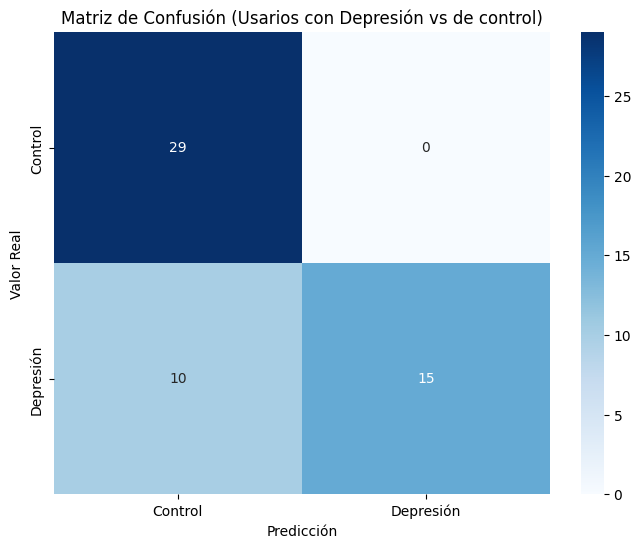

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))

# Crear una matriz de confusión usando el heatmap de Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Control', 'Depresión'], yticklabels=['Control', 'Depresión'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Usarios con Depresión vs de control)')

# Mostrar la gráfica
plt.show()

#Modelo Bosque Aleatorio

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Importa las librerías necesarias y divide los datos en conjuntos de entrenamiento y validación
from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val

# Crea un modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=300,  # Numero de alboles
                                             max_depth=100, # profunidad máxima
                                             random_state=42)  # selección de la semilla de manera aleatoria


# Entrena el modelo en los datos de entrenamiento
random_forest_model.fit(X_train, y_train)

# Realiza predicciones en los datos de validación
y_val_pred = random_forest_model.predict(X_val)

# Calcula la precisión (accuracy) del modelo en los datos de validación
accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy (validación): {:.2f}".format(accuracy))

# Calcula la precisión del modelo en los datos de validación
precision = precision_score(y_val, y_val_pred)
print("Precision (validación): {:.2f}".format(precision))

# Calcula la exactitud (recall) del modelo en los datos de validación
recall = recall_score(y_val, y_val_pred)
print("Recall (validación): {:.2f}".format(recall))

# Calcula el F1-score del modelo en los datos de validación
f1 = f1_score(y_val, y_val_pred)
print("F1-score (validación): {:.2f}".format(f1))

# Calcula y muestra métricas en el conjunto de entrenamiento
y_train_pred = random_forest_model.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

#




Accuracy (validación): 0.96
Precision (validación): 1.00
Recall (validación): 0.92
F1-score (validación): 0.96


In [ ]:
# Imprimir las métricas de entrenamiento
print(f'Accuracy entrenamiento: {accuracy_train * 100:.2f}%')
print(f'Precisión  entrenamiento: {precision_train * 100:.2f}%')
print(f'Recall  entrenamiento: {recall_train * 100:.2f}%')
print(f'Puntuación F1  entrenamiento: {f1_train * 100:.2f}%')
print('\n')
# Imprimir las métricas de validación
print(f'Accuracy  validación: {accuracy * 100:.2f}%')
print(f'Precisión  validación: {precision* 100:.2f}%')
print(f'Recall  validación: {recall* 100:.2f}%')
print(f'Puntuación F1 validación: {f1 * 100:.2f}%')

Accuracy entrenamiento: 100.00%
Precisión  entrenamiento: 100.00%
Recall  entrenamiento: 100.00%
Puntuación F1  entrenamiento: 100.00%


Accuracy  validación: 96.30%
Precisión  validación: 100.00%
Recall  validación: 92.00%
Puntuación F1 validación: 95.83%


# **Matriz de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_RF = random_forest_model.predict(X_val)

# Obtiene la matriz de confusión. Las filas corresponden a las clases reales,
umbral = 0.5  # Puedes ajustar este umbral según tus necesidades
y_pred_binario = (y_pred_RF > umbral).astype(int)

# Calcular la matriz de confusión con las etiquetas binarias
cm = confusion_matrix(y_val, y_pred_binario)
prop_real = np.sum(y_val)/len(y_val)
prop_etiqutados = (cm[0,1]+cm[1,1])/len(y_val)

print("Matriz de confusión: \n\n", cm, "\n")
print('Proporción de comentarios positivos: %.2f'% prop_real)
print('Proporción de comentarios positivos etiquetados: %.2f'% prop_etiqutados)

Matriz de confusión: 

 [[29  0]
 [ 2 23]] 

Proporción de comentarios positivos: 0.46
Proporción de comentarios positivos etiquetados: 0.43


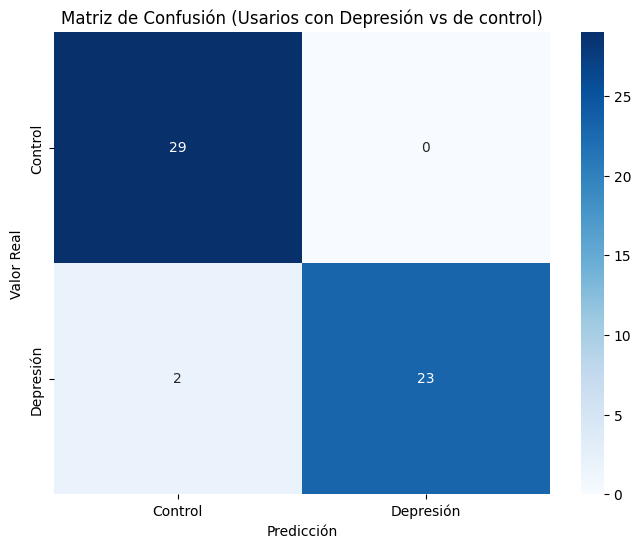

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))

# Crear una matriz de confusión usando el heatmap de Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Control', 'Depresión'], yticklabels=['Control', 'Depresión'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Usarios con Depresión vs de control)')

# Mostrar la gráfica
plt.show()

#Modelo SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import os

svm_model_p = SVC(kernel='linear', degree=4, C=100, max_iter=100000, probability=False)

# Entrenar el modelo en los datos de entrenamiento
svm_model_p.fit(X_train, y_train)

# Predecir etiquetas en el conjunto de validación
y_val_pred = svm_model_p.predict(X_val)

# Calcula la precisión del modelo en el conjunto de validación
accuracy = accuracy_score(y_val, y_val_pred)


# Calcula precisión, exhaustividad y puntuación F1 en el conjunto de validación
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Calcula y muestra métricas en el conjunto de entrenamiento
y_train_pred = svm_model_p.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print("\nEntrenamiento:")
print("Exactitud (entrenamiento): {:.2f}%".format(accuracy_train*100))
print("Precision (entrenamiento): {:.2f}%".format(precision_train*100))
print("Recall (entrenamiento): {:.2f}%".format(recall_train*100))
print("F1-score (entrenamiento): {:.2f}%".format(f1_train*100))
print("\nValidación:")
print(f"Exactitud en el conjunto de validación: {round(accuracy,2)*100}%")
print(f"Precisión en el conjunto de validación:{round(precision,2)*100}%")
print(f"Recall en el conjunto de validación: {round(recall,2)*100}%")
print(f"F1-score en el conjunto de validación:{round(f1,2)*100}%")




Entrenamiento:
Exactitud (entrenamiento): 100.00%
Precision (entrenamiento): 100.00%
Recall (entrenamiento): 100.00%
F1-score (entrenamiento): 100.00%

Validación:
Exactitud en el conjunto de validación: 94.0%
Precisión en el conjunto de validación:96.0%
Recall en el conjunto de validación: 92.0%
F1-score en el conjunto de validación:94.0%


# **Matriz de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_RF = svm_model_p.predict(X_val)

# Obtiene la matriz de confusión. Las filas corresponden a las clases reales,
umbral = 0.5  # Puedes ajustar este umbral según tus necesidades
y_pred_binario = (y_pred_RF > umbral).astype(int)

# Calcular la matriz de confusión con las etiquetas binarias
cm = confusion_matrix(y_val, y_pred_binario)
prop_real = np.sum(y_val)/len(y_val)
prop_etiqutados = (cm[0,1]+cm[1,1])/len(y_val)

print("Matriz de confusión: \n\n", cm, "\n")
print('Proporción de comentarios positivos: %.2f'% prop_real)
print('Proporción de comentarios positivos etiquetados: %.2f'% prop_etiqutados)

Matriz de confusión: 

 [[28  1]
 [ 2 23]] 

Proporción de comentarios positivos: 0.46
Proporción de comentarios positivos etiquetados: 0.44


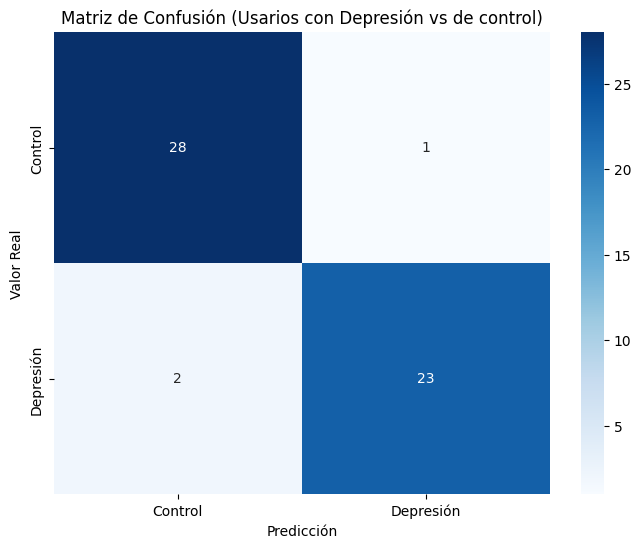

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))

# Crear una matriz de confusión usando el heatmap de Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Control', 'Depresión'], yticklabels=['Control', 'Depresión'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Usarios con Depresión vs de control)')

# Mostrar la gráfica
plt.show()

# **Regresión Logistica**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
# Crear el modelo de regresión logística
lr_model = LogisticRegression(C=10)
lr_model.fit(X_train, y_train)

# Calcular el porcentaje de acierto en el conjunto de entrenamiento
accuracy_train = lr_model.score(X_train, y_train) * 100

# Calcular el porcentaje de acierto en el conjunto de validación
accuracy_val = lr_model.score(X_val, y_val) * 100

# Predicciones en el conjunto de entrenamiento y validación
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

# Calcular precisión en el conjunto de entrenamiento y validación
precision_train = precision_score(y_train, y_train_pred)* 100
precision_val = precision_score(y_val, y_val_pred)* 100

# Calcular exhaustividad (recall) en el conjunto de entrenamiento y validación
recall_train = recall_score(y_train, y_train_pred)* 100
recall_val = recall_score(y_val, y_val_pred)* 100

# Calcular puntuación F1 en el conjunto de entrenamiento y validación
f1_train = f1_score(y_train, y_train_pred)* 100
f1_val = f1_score(y_val, y_val_pred)* 100


In [ ]:
# Mostrar métricas de entrenamiento
print("Métricas de entrenamiento:")
print("Exactitud (entrenamiento): {:.2f}%".format(accuracy_train))
print("Precisión (entrenamiento): {:.2f}%".format(precision_train))
print("Exhaustividad (entrenamiento): {:.2f}%".format(recall_train))
print("Puntuación F1 (entrenamiento): {:.2f}%".format(f1_train))
print('-'*40)
# Mostrar métricas de validación
print("\nMétricas de validación:")
print("Exactitud (validación): {:.2f}%".format(accuracy_val))
print("Precisión (validación): {:.2f}%".format(precision_val))
print("Exhaustividad (validación): {:.2f}%".format(recall_val))
print("Puntuación F1 (validación): {:.2f}%".format(f1_val))

Métricas de entrenamiento:
Exactitud (entrenamiento): 100.00%
Precisión (entrenamiento): 100.00%
Exhaustividad (entrenamiento): 100.00%
Puntuación F1 (entrenamiento): 100.00%
----------------------------------------

Métricas de validación:
Exactitud (validación): 96.30%
Precisión (validación): 96.00%
Exhaustividad (validación): 96.00%
Puntuación F1 (validación): 96.00%


# **Matriz de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_RF = lr_model.predict(X_val)

# Obtiene la matriz de confusión. Las filas corresponden a las clases reales,
umbral = 0.5  # Puedes ajustar este umbral según tus necesidades
y_pred_binario = (y_pred_RF > umbral).astype(int)

# Calcular la matriz de confusión con las etiquetas binarias
cm = confusion_matrix(y_val, y_pred_binario)
prop_real = np.sum(y_val)/len(y_val)
prop_etiqutados = (cm[0,1]+cm[1,1])/len(y_val)

print("Matriz de confusión: \n\n", cm, "\n")
print('Proporción de comentarios positivos: %.2f'% prop_real)
print('Proporción de comentarios positivos etiquetados: %.2f'% prop_etiqutados)

Matriz de confusión: 

 [[28  1]
 [ 1 24]] 

Proporción de comentarios positivos: 0.46
Proporción de comentarios positivos etiquetados: 0.46


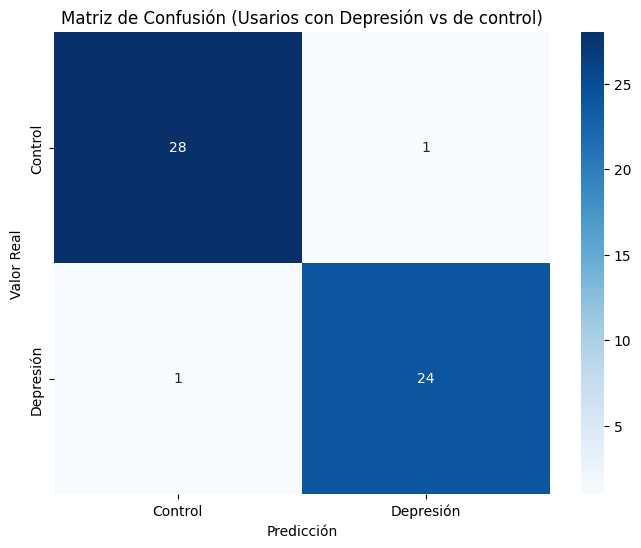

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))

# Crear una matriz de confusión usando el heatmap de Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Control', 'Depresión'], yticklabels=['Control', 'Depresión'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Usarios con Depresión vs de control)')

# Mostrar la gráfica
plt.show()